## Fig5 plot

=== Filling missing values ===
Average MSE: Filled 242 missing values with mean 0.0169
Average RMSE: Filled 242 missing values with mean 0.0970
Average L2: Filled 242 missing values with mean 6.4616
Average MAE: Filled 242 missing values with mean 0.0480
Average Pearson_Correlation: Filled 242 missing values with mean 0.9616
Average Cosine_Similarity: Filled 242 missing values with mean 0.9666
Average R_squared: Filled 242 missing values with mean 0.8938
Average Top20_DE_MSE: Filled 250 missing values with mean 0.3932
Average Top20_DE_RMSE: Filled 250 missing values with mean 0.4671
Average Top20_DE_L2: Filled 250 missing values with mean 2.0844
Average Top20_DE_MAE: Filled 250 missing values with mean 0.3992
Average Top20_DE_Pearson_Correlation: Filled 250 missing values with mean 0.8922
Average Top20_DE_Cosine_Similarity: Filled 250 missing values with mean 0.9631
Average Top20_DE_R_squared: Filled 250 missing values with mean 0.2989
Average Pearson_Correlation_delta: Filled 242 miss

/tmp/ipykernel_3930388/3132727202.py:284: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metric = df_task.groupby('model')[metric].mean().reset_index()
/tmp/ipykernel_3930388/3132727202.py:284: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metric = df_task.groupby('model')[metric].mean().reset_index()
/tmp/ipykernel_3930388/3132727202.py:284: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metric = df_task.groupby(

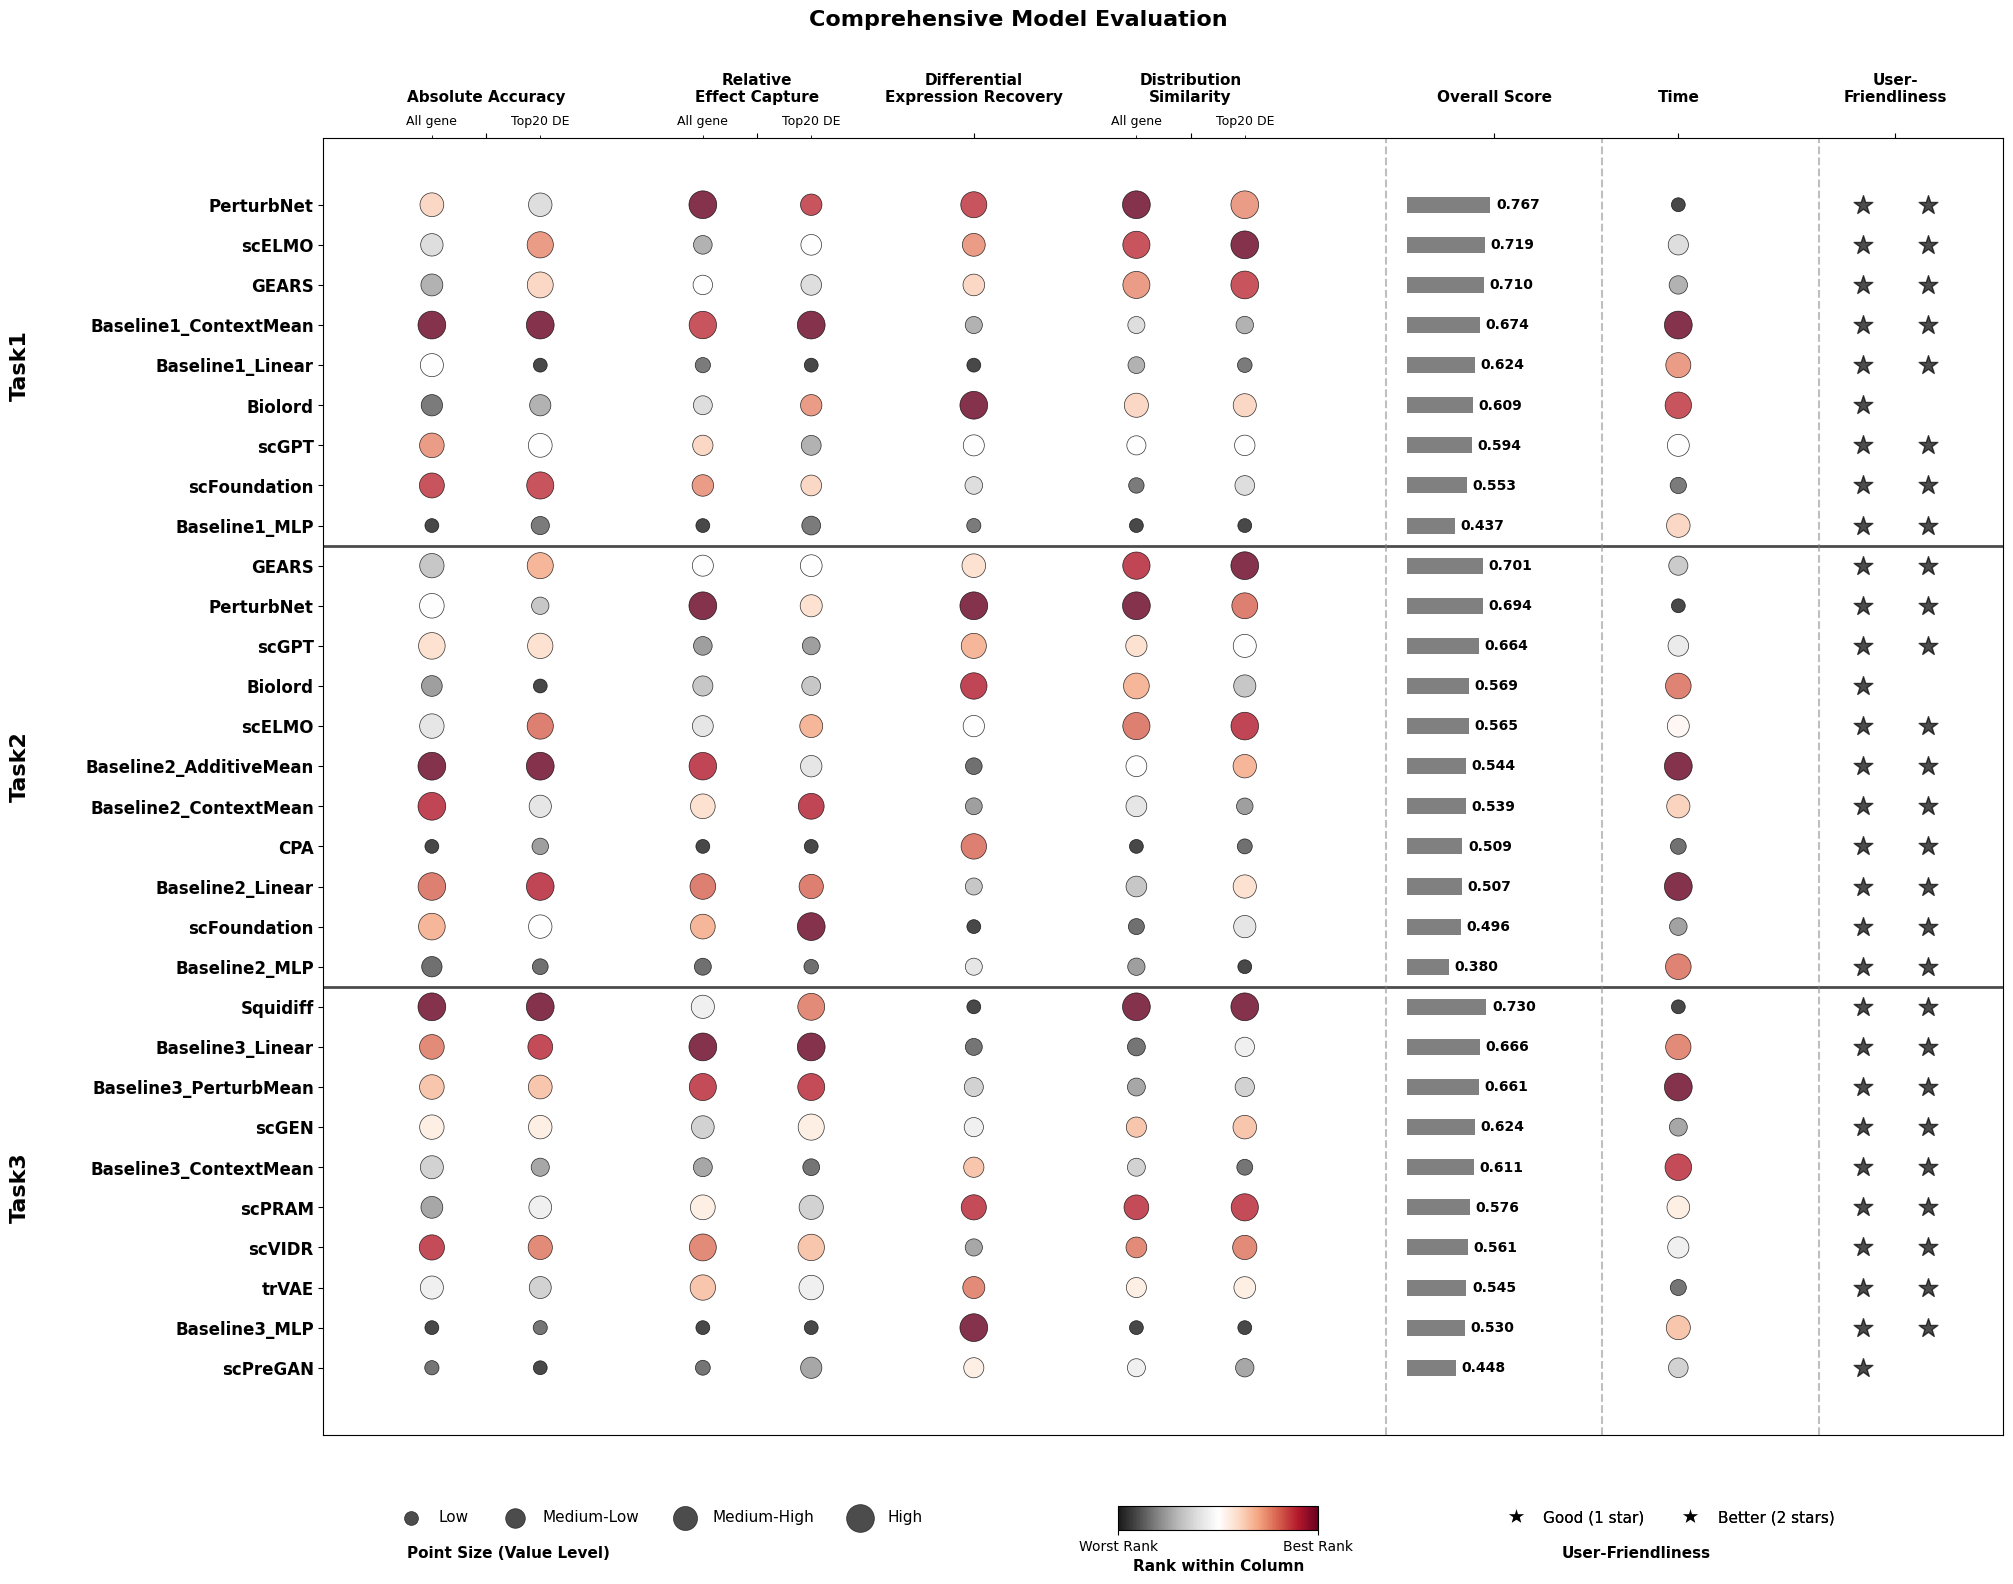

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


file_path = '/data2/lanxiang/perturb_benchmark_v2/SA_review/Round1/Fig/Fig5/Allgenes_top20DE_alltask_average_metric.csv'
df = pd.read_csv(file_path)

# --- 时间字符串转分钟 ---
def parse_time_to_minutes(time_str):
    if pd.isna(time_str) or time_str == '-' or time_str == '':
        return np.nan
    time_str = str(time_str).strip()
    total_minutes = 0
    hour_match = re.search(r'(\d+)h', time_str)
    if hour_match:
        total_minutes += int(hour_match.group(1)) * 60
    min_match = re.search(r'(\d+)min', time_str)
    if min_match:
        total_minutes += int(min_match.group(1))
    return total_minutes if total_minutes > 0 else np.nan

# --- 时间数据 ---
time_data = {
    'dataset': ['DatlingerBock2017', 'DatlingerBock2021', 'Adamson', 'Fengzhang2023', 
                'FrangiehIzar2021_RNA', 'PapalexiSatija2021_eccite_RNA', 'ReplogleWeissman2022_rpe1',
                'TianKampmann2021_CRISPRi', 'TianKampmann2021_CRISPRa', 'Junyue_Cao', 'vcc_train_filtered',
                'DixitRegev2016', 'NormanWeissman2019_filtered', 'Sunshine2023_CRISPRi_sarscov2', 'Arce_MM_CRISPRi',
                'Kang', 'Haber', 'Weinreb', 'Hagai', 'Srivatsan_sciplex3_sub10', 'Burkhardt_sub10',
                'Tahoe100_sub10', 'Parse_10M_PBMC_sub10', 'Perturb_KHP_sub10', 'Perturb_cmo_V1_sub10'],
    'Baseline1_MLP': ['3min', '9min', '', '4h37min', '3min', '1min', '30min', '2min', '2min', '7min', '5min', '4min', '4min', '2min', '5min', '', '', '', '', '', '', '', '', '', ''],
    'Baseline1_ContextMean': ['0.05min', '0.05min', '0.1min', '0.8min', '0.2min', '0.05min', '0.8min', '0.1min', '0.1min', '0.8min', '0.1min', '0.05min', '0.05min', '0.05min', '0.05min', '', '', '', '', '', '', '', '', '', ''],
    'Baseline1_Linear': ['1min', '1min', '3min', '35min', '7min', '1min', '21min', '3min', '2min', '16min', '3min', '1min', '1min', '1min', '1min', '', '', '', '', '', '', '', '', '', ''],
    'Baseline2_MLP': ['', '', '', '', '', '', '', '', '', '', '', '4min', '4min', '2min', '5min', '', '', '', '', '', '', '', '', '', ''],
    'Baseline2_ContextMean': ['', '', '', '', '', '', '', '', '', '', '', '0.05min', '0.05min', '0.05min', '0.05min', '', '', '', '', '', '', '', '', '', ''],
    'Baseline2_AdditiveMean': ['', '', '', '', '', '', '', '', '', '', '', '0.1min', '0.2min', '0.1min', '0.1min', '', '', '', '', '', '', '', '', '', ''],
    'Baseline2_Linear': ['', '', '', '', '', '', '', '', '', '', '', '1min', '2min', '1min', '1min', '', '', '', '', '', '', '', '', '', ''],
    'GEARS': ['2min', '15min', '', '21h52min', '28min', '10min', '2h25min', '25min', '15min', '4h12min', '50min', '19min', '44min', '22min', '1h', '', '', '', '', '', '', '', '', '', ''],
    'scELMO': ['2min', '15min', '', '14h4min', '28min', '10min', '2h31min', '25min', '15min', '4h8min', '1h6min', '22min', '41min', '24min', '33min', '', '', '', '', '', '', '', '', '', ''],
    'PerturbNet': ['6 min', '22 min', '', '13h25min', '4h21min', '1h19min', '7h20min', '2h18min', '48 min', '2h7min', '3h45min', '2h7min', '8h10min', '43 min', '49 min', '', '', '', '', '', '', '', '', '', ''],
    'scGPT': ['2min', '15min', '1h11min', '10h32min', '27min', '11min', '1h16min', '27min', '18min', '1h35min', '1h4min', '26min', '28min', '28min', '46min', '', '', '', '', '', '', '', '', '', ''],
    'scFoundation': ['6min', '32min', '3h13min', '14h10min', '1h29min', '49min', '8h13min', '43min', '28min', '1h41min', '1h3min', '44min', '1h58min', '1h', '30min', '', '', '', '', '', '', '', '', '', ''],
    'Biolord': ['2min', '2min', '2min', '24min', '5min', '2min', '2min', '8min', '8min', '8min', '3min', '2min', '3min', '8min', '2min', '', '', '', '', '', '', '', '', '', ''],
    'CPA': ['', '', '', '', '', '', '', '', '', '', '', '7 min', '1h30min', '7 min', '8 min', '', '', '', '', '', '', '', '', '', ''],
    'Baseline3_MLP': ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '2min', '2min', '2min', '2min', '4min', '43min', '3h43min', '1h39min', '32min', '1h5min'],
    'Baseline3_ContextMean': ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '0.05min', '0.05min', '0.05min', '0.05min', '0.05min', '0.1min', '5min', '10min', '0.09min', '0.1min'],
    'Baseline3_PerturbMean': ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '0.1min', '0.1min', '0.1min', '0.2min', '0.1min', '0.3min', '13min', '30min', '0.15min', '0.4min'],
    'Baseline3_Linear': ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '1min', '1min', '2min', '6min', '1min', '14min', '4h15min', '8h15min', '8min', '22min'],
    'scPreGAN': ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '30min', '34min', '38min', '27min', '1h51min', '3h6min', '22h44min', '43h27min', '5h0min', '2h28min'],
    'scVIDR': ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '23min', '11min', '2h48min', '38min', '1h30min', '3h15min', '87h59min', '42h59min', '4h20min', '1h30min'],
    'scGEN': ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '25min', '6min', '24min', '34min', '3h33min', '14h28min', '', '', '27h13min', '3h56min'],
    'trVAE': ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '34min', '6min', '3h29min', '38min', '2h9min', '19h30min', '89h55min', '', '8h35min', '1h34min'],
    'scPRAM': ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '19.35min', '6.55min', '333.63min', '44.97min', '475.05min', '406.36min', '', '', '723.39min', '135.16min'],
    'Squidiff': ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '27.18h', '10.43h', '19.33h', '10.4h', '22.33h', '21.95h', '', '', '18.57h', '39.51h'],
}

time_df = pd.DataFrame(time_data)
for col in time_df.columns[1:]:
    time_df[col] = time_df[col].apply(parse_time_to_minutes)

# --- 附加信息字典 ---
user_friendliness = {
    'Baseline1_MLP': 2, 'Baseline2_MLP': 2, 'Baseline3_MLP': 2, 'Baseline1_ContextMean':2,'Baseline2_ContextMean':2,'Baseline3_ContextMean':2,'Baseline1_Linear':2,'Baseline2_Linear':2,'Baseline3_Linear':2,'Baseline2_AdditiveMean':2,'Baseline3_PerturbMean':2,'GEARS': 2, 'scELMO': 2,
    'scGPT': 2, 'scFoundation': 2, 'scPreGAN': 1, 'trVAE': 2, 'scGEN': 2,
    'CPA': 2, 'scVIDR': 2, 'PerturbNet': 2,  'Biolord': 1,"scPRAM":2,'Squidiff':2
}

task_datasets = {
    'Task1': ['DatlingerBock2017', 'DatlingerBock2021', 'Fengzhang2023', 'FrangiehIzar2021_RNA',
              'PapalexiSatija2021_eccite_RNA', 'ReplogleWeissman2022_rpe1', 'TianKampmann2021_CRISPRi',
              'TianKampmann2021_CRISPRa', 'vcc_train_filtered', 'DixitRegev2016', 'NormanWeissman2019_filtered',
              'Sunshine2023_CRISPRi_sarscov2', 'Arce_MM_CRISPRi'],
    'Task2': ['DixitRegev2016', 'NormanWeissman2019_filtered', 'Sunshine2023_CRISPRi_sarscov2', 'Arce_MM_CRISPRi'],
    'Task3': ['Kang', 'Haber', 'Weinreb_time', 'Hagai', 'Srivatsan_sciplex3_sub10', 'Burkhardt_sub10', 'Perturb_cmo_V1_sub10']
}

# Time average calculation
def calculate_time_average(task, model):
    datasets = task_datasets[task]
    task_time_df = time_df[time_df['dataset'].isin(datasets)]
    if model in task_time_df.columns:
        avg_time = task_time_df[model].mean()
        return avg_time if not pd.isna(avg_time) else np.nan
    return np.nan

time_scores = []
for _, row in df.iterrows():
    task = row['Task']
    model = row['model']
    avg_time = calculate_time_average(task, model)
    time_scores.append(avg_time)
df['Average_Time'] = time_scores

# --- New 4-dimensional metrics definition ---
# 1. Absolute Accuracy (error + correlation metrics)
gene_expression_allgene = ['Average MSE', 'Average RMSE', 'Average L2', 'Average MAE', 
                          'Average Pearson_Correlation', 'Average Cosine_Similarity', 'Average R_squared']
gene_expression_top20 = ['Average Top20_DE_MSE', 'Average Top20_DE_RMSE', 'Average Top20_DE_L2', 
                        'Average Top20_DE_MAE', 'Average Top20_DE_Pearson_Correlation', 
                        'Average Top20_DE_Cosine_Similarity', 'Average Top20_DE_R_squared']

# 2. Relative Effect Capture
delta_analysis_allgene = ['Average Pearson_Correlation_delta', 'Average delta_agreement_acc']
delta_analysis_top20 = ['Average Top20_DE_Pearson_Correlation_delta', 'Average Top20_DE_delta_agreement_acc']

# 3. Differential Expression Recovery (only allgene)
differential_expression_allgene = ['Top50_Accuracy', 'spearman_r']

# 4. Distribution Similarity
distribution_allgene = ['Average MMD', 'Average Wasserstein']
distribution_top20 = ['Average Top20_DE_MMD', 'Average Top20_DE_Wasserstein']

# Combine all metrics
all_metrics = (gene_expression_allgene + gene_expression_top20 + 
               delta_analysis_allgene + delta_analysis_top20 + 
               differential_expression_allgene + 
               distribution_allgene + distribution_top20 + 
               ['Average_Time'])

# Define metrics that need to be reversed (lower is better)
metrics_to_reverse = ['Average MSE', 'Average RMSE', 'Average L2', 'Average MAE',
                     'Average Top20_DE_MSE', 'Average Top20_DE_RMSE', 'Average Top20_DE_L2', 'Average Top20_DE_MAE',
                     'Average MMD', 'Average Wasserstein', 'Average Top20_DE_MMD', 'Average Top20_DE_Wasserstein',
                     'Average_Time']

# --- Fill missing values ---
print("=== Filling missing values ===")
for metric in all_metrics:
    if metric in df.columns:
        missing_count = df[metric].isna().sum()
        if missing_count > 0:
            mean_value = df[metric].mean()
            if not pd.isna(mean_value):
                df[metric] = df[metric].fillna(mean_value)
                print(f"{metric}: Filled {missing_count} missing values with mean {mean_value:.4f}")
            else:
                print(f"{metric}: All values are missing, cannot fill")

# --- Calculate aggregated dimension scores ---
def calculate_aggregated_dimension_scores(df_data, metrics_list, metrics_to_reverse):
    """Calculate aggregated score for a group of metrics based on rank average"""
    aggregated_scores = []
    
    for _, row in df_data.iterrows():
        scores = []
        for metric in metrics_list:
            if metric in df_data.columns:
                value = row[metric]
                if not pd.isna(value):
                    all_values = df_data[metric].dropna()
                    if len(all_values) > 1:
                        if metric in metrics_to_reverse:
                            # Lower is better, need to reverse rank
                            rank = (all_values < value).sum() + 1
                            normalized_score = (len(all_values) - rank + 1) / len(all_values)
                        else:
                            # Higher is better
                            rank = (all_values > value).sum() + 1
                            normalized_score = (len(all_values) - rank + 1) / len(all_values)
                        scores.append(normalized_score)
                    else:
                        scores.append(0.5)
                else:
                    scores.append(0.5)
        
        # Calculate average score for this model in this dimension
        if scores:
            aggregated_scores.append(np.mean(scores))
        else:
            aggregated_scores.append(0.5)
    
    return np.array(aggregated_scores)

# Calculate aggregated dimension scores for each task
def add_aggregated_scores(df):
    df_new = df.copy()
    
    for task in ['Task1', 'Task2', 'Task3']:
        df_task = df[df['Task'] == task]
        
        # Calculate aggregated scores for each dimension
        gene_expr_allgene_scores = calculate_aggregated_dimension_scores(df_task, gene_expression_allgene, metrics_to_reverse)
        gene_expr_top20_scores = calculate_aggregated_dimension_scores(df_task, gene_expression_top20, metrics_to_reverse)
        
        delta_allgene_scores = calculate_aggregated_dimension_scores(df_task, delta_analysis_allgene, metrics_to_reverse)
        delta_top20_scores = calculate_aggregated_dimension_scores(df_task, delta_analysis_top20, metrics_to_reverse)
        
        diff_expr_scores = calculate_aggregated_dimension_scores(df_task, differential_expression_allgene, metrics_to_reverse)
        
        dist_allgene_scores = calculate_aggregated_dimension_scores(df_task, distribution_allgene, metrics_to_reverse)
        dist_top20_scores = calculate_aggregated_dimension_scores(df_task, distribution_top20, metrics_to_reverse)
        
        # Add time score calculation (ensure time is properly reversed)
        time_scores = calculate_aggregated_dimension_scores(df_task, ['Average_Time'], metrics_to_reverse)
        
        # Add aggregated scores for this task's rows
        task_indices = df_task.index
        df_new.loc[task_indices, 'Gene_Expression_AllGene'] = gene_expr_allgene_scores
        df_new.loc[task_indices, 'Gene_Expression_Top20DE'] = gene_expr_top20_scores
        df_new.loc[task_indices, 'Delta_Analysis_AllGene'] = delta_allgene_scores
        df_new.loc[task_indices, 'Delta_Analysis_Top20DE'] = delta_top20_scores
        df_new.loc[task_indices, 'Differential_Expression_AllGene'] = diff_expr_scores
        df_new.loc[task_indices, 'Distribution_AllGene'] = dist_allgene_scores
        df_new.loc[task_indices, 'Distribution_Top20DE'] = dist_top20_scores
        df_new.loc[task_indices, 'Time_Score'] = time_scores
    
    return df_new

# Add aggregated scores
df = add_aggregated_scores(df)

# --- New Overall Score calculation: 4 dimensions with 25% each ---
def calculate_overall_score_new(task):
    df_task = df[df['Task'] == task]
    model_list = df_task['model'].unique()
    scores = {}
    
    for model in model_list:
        model_data = df_task[df_task['model'] == model]
        if model_data.empty:
            scores[model] = 0
            continue
        
        # Calculate average score for 4 dimensions
        gene_expr_score = (model_data['Gene_Expression_AllGene'].iloc[0] + 
                          model_data['Gene_Expression_Top20DE'].iloc[0]) / 2
        
        delta_score = (model_data['Delta_Analysis_AllGene'].iloc[0] + 
                      model_data['Delta_Analysis_Top20DE'].iloc[0]) / 2
        
        diff_expr_score = model_data['Differential_Expression_AllGene'].iloc[0]
        
        dist_score = (model_data['Distribution_AllGene'].iloc[0] + 
                     model_data['Distribution_Top20DE'].iloc[0]) / 2
        
        # 4 dimensions with 25% each
        overall_score = (gene_expr_score + delta_score + diff_expr_score + dist_score) / 4
        scores[model] = overall_score
    
    return scores

# Calculate new Overall Score and sort
task_model_order_sorted = {}
task_model_score_sorted = {}
for task in ['Task1', 'Task2', 'Task3']:
    scores = calculate_overall_score_new(task)
    sorted_models = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    task_model_order_sorted[task] = [model for model, _ in sorted_models]
    task_model_score_sorted[task] = dict(sorted_models)

# --- Prepare plotting data ---
# Aggregated metrics list (for plotting)
plot_metrics = ['Gene_Expression_AllGene', 'Gene_Expression_Top20DE',
                'Delta_Analysis_AllGene', 'Delta_Analysis_Top20DE', 
                'Differential_Expression_AllGene',  # This dimension has no Top20DE
                'Distribution_AllGene', 'Distribution_Top20DE']

# --- Figure plotting ---
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111)

y_positions = []
task_labels = []
y_pos = 0

for task_idx, task in enumerate(['Task1', 'Task2', 'Task3']):
    model_order = task_model_order_sorted[task]
    df_task = df[df['Task'] == task].copy()

    # Sort by Overall Score
    ordered_models = pd.Categorical(df_task['model'], categories=model_order, ordered=True)
    df_task['model'] = ordered_models
    df_task = df_task.sort_values('model')

    # Plot performance metrics scatter plot
    for j, metric in enumerate(plot_metrics):
        if metric in df_task.columns:
            df_metric = df_task.groupby('model')[metric].mean().reset_index()
            df_metric['model'] = pd.Categorical(df_metric['model'], categories=model_order, ordered=True)
            df_metric = df_metric.sort_values('model').reset_index(drop=True)
            
            # Size based on values
            metric_values = df_metric[metric].values
            metric_values_clean = metric_values[~np.isnan(metric_values)]
            if len(metric_values_clean) > 0:
                min_val = np.min(metric_values_clean)
                max_val = np.max(metric_values_clean)
                if max_val > min_val:
                    normalized_values = (metric_values - min_val) / (max_val - min_val)
                    df_metric['size'] = 100 + normalized_values * 300
                else:
                    df_metric['size'] = 250
            else:
                df_metric['size'] = 250
            
            # Color based on rank within each column
            ranks = df_metric[metric].rank(ascending=False, na_option='bottom')
            df_metric['color'] = ranks
            
            # Calculate x position - reduce intervals
            if j == 0:  # Absolute Accuracy - All gene
                x_pos = 1
            elif j == 1:  # Absolute Accuracy - Top20 DE  
                x_pos = 2
            elif j == 2:  # Relative Effect Capture - All gene
                x_pos = 3.5  # Reduced interval, was 4
            elif j == 3:  # Relative Effect Capture - Top20 DE
                x_pos = 4.5  # Reduced interval, was 5
            elif j == 4:  # Differential Expression Recovery - All gene
                x_pos = 6    # Reduced interval, was 7
            elif j == 5:  # Distribution Similarity - All gene
                x_pos = 7.5  # Reduced interval, was 9
            elif j == 6:  # Distribution Similarity - Top20 DE
                x_pos = 8.5  # Reduced interval, was 10
            
            y_positions_for_models = [y_pos + i for i in range(len(model_order))]
            
            # Plot scatter points
            scatter = ax.scatter(
                x=[x_pos] * len(df_metric),
                y=y_positions_for_models,
                s=df_metric['size'], 
                c=df_metric['color'], 
                cmap='RdGy',
                alpha=0.8,
                edgecolors='black',
                linewidths=0.5
            )

    # Add Overall Score bar chart
    sorted_scores = [task_model_score_sorted[task].get(model, 0) for model in model_order]
    model_y_positions = [y_pos + i for i in range(len(model_order))]
    
    overall_x_pos = 10  # Adjust position to fit new layout
    
    bars = ax.barh(model_y_positions, sorted_scores,
                   height=0.4, left=overall_x_pos, color='grey', alpha=1)
    
    # Add value labels for Overall Score
    for i, (bar, score) in enumerate(zip(bars, sorted_scores)):
        ax.text(bar.get_width() + overall_x_pos + 0.05, bar.get_y() + bar.get_height()/2, 
               f'{score:.3f}', ha='left', va='center', fontsize=10, fontweight='bold')

    # Add Time scatter plot
    df_time = df_task.groupby('model')['Time_Score'].mean().reset_index()
    df_time['model'] = pd.Categorical(df_time['model'], categories=model_order, ordered=True)
    df_time = df_time.sort_values('model').reset_index(drop=True)
    
    # Size based on Time_Score values
    time_values = df_time['Time_Score'].values
    time_values_clean = time_values[~np.isnan(time_values)]
    if len(time_values_clean) > 0:
        min_val = np.min(time_values_clean)
        max_val = np.max(time_values_clean)
        if max_val > min_val:
            normalized_values = (time_values - min_val) / (max_val - min_val)
            df_time['size'] = 100 + normalized_values * 300
        else:
            df_time['size'] = 250
    else:
        df_time['size'] = 250
    
    # Color based on rank for Time
    ranks = df_time['Time_Score'].rank(ascending=False, na_option='bottom')
    df_time['color'] = ranks
    
    time_x_pos = 12.5  # Adjust position
    
    # Plot time scatter points
    scatter = ax.scatter(
        x=[time_x_pos] * len(df_time),
        y=model_y_positions,
        s=df_time['size'], 
        c=df_time['color'], 
        cmap='RdGy',
        alpha=0.8,
        edgecolors='black',
        linewidths=0.5
    )

    # Add User-Friendliness stars - modify alignment
    for j, model in enumerate(model_order):
        uf_score = user_friendliness.get(model, 1)
        star_color = 'black'
        
        uf_x_pos = 14.5  # Adjust position
        
        if uf_score == 2:
            # Two stars: left and right distribution
            ax.scatter(uf_x_pos - 0.3, y_pos + j, s=200, marker='*', color=star_color, alpha=0.7)
            ax.scatter(uf_x_pos + 0.3, y_pos + j, s=200, marker='*', color=star_color, alpha=0.7)
        else:
            # One star: aligned with first star (left) of two-star models
            ax.scatter(uf_x_pos - 0.3, y_pos + j, s=200, marker='*', color=star_color, alpha=0.7)

    # Record model names and y-axis
    for j, model in enumerate(model_order):
        y_positions.append(y_pos + j)
        task_labels.append(f'{task}: {model}')

    y_pos += len(model_order)

    # Task separator lines
    if task_idx < 2:
        ax.axhline(y=y_pos - 0.5, color='black', linestyle='-', alpha=0.7, linewidth=2)

# Set x-axis - update positions and labels with reduced intervals
major_positions = [1.5, 4, 6, 8, 10.8, 12.5, 14.5]  # Reduced intervals
major_labels = ['Absolute Accuracy', 'Relative\nEffect Capture', 'Differential\nExpression Recovery', 'Distribution\nSimilarity', 'Overall Score', 'Time', 'User-\nFriendliness']

ax.set_xticks(major_positions, minor=False)
ax.set_xticklabels(major_labels, minor=False, fontsize=11, weight='bold')

# Set minor ticks - adjust positions
minor_positions = [1, 2, 3.5, 4.5, 6, 7.5, 8.5]  # Adjust minor tick positions
minor_labels = ['All gene', 'Top20 DE', 'All gene', 'Top20 DE', 'All gene', 'All gene', 'Top20 DE']

ax.set_xticks(minor_positions, minor=True)
ax.set_xticklabels(minor_labels, minor=True, fontsize=9)
ax.tick_params(axis='x', which='major', pad=20)
ax.tick_params(axis='x', which='minor', pad=5)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

ax.set_xlim(0, 15.5)  # Adjust xlim
ax.set_xlabel('', fontsize=14)

# y-axis
model_names_only = [label.split(': ')[1] for label in task_labels]
ax.set_yticks(y_positions)
ax.set_yticklabels(model_names_only, fontsize=12, fontweight='bold')

# Task labels - increase distance
task_y_centers = []
start_pos = 0
for task in ['Task1', 'Task2', 'Task3']:
    task_models = task_model_order_sorted[task]
    end_pos = start_pos + len(task_models)
    center_y = (start_pos + end_pos - 1) / 2
    task_y_centers.append(center_y)
    start_pos = end_pos

for i, (task, center_y) in enumerate(zip(['Task1', 'Task2', 'Task3'], task_y_centers)):
    ax.text(-2.8, center_y, task, ha='center', va='center', fontsize=16, fontweight='bold', rotation=90)

# Add separator lines - update positions
ax.axvline(x=9.8, color='gray', linestyle='--', alpha=0.5)   # Before Overall Score
ax.axvline(x=11.8, color='gray', linestyle='--', alpha=0.5)  # Before Time
ax.axvline(x=13.8, color='gray', linestyle='--', alpha=0.5)  # Before User-Friendliness

# Invert Y-axis so Task1 is at top and high-score models are at top
ax.invert_yaxis()

# Legend settings
legend_elements = []
sizes = [100, 200, 300, 400]
size_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
for size, label in zip(sizes, size_labels):
    legend_elements.append(plt.scatter([], [], s=size, c='black', alpha=0.7, 
                                     edgecolors='black', linewidths=0.5,
                                     label=label))

# Point Size Legend
size_legend = ax.legend(handles=legend_elements, 
                       loc='lower center', bbox_to_anchor=(0.2, -0.08),
                       ncol=4,
                       frameon=False,
                       fontsize=11)

# Size legend title
size_legend_ax = fig.add_axes([0.05, 0.02, 0.3, 0.01])
size_legend_ax.text(0.65, -0.5, 'Point Size (Value Level)', ha='center', va='center', 
                   fontsize=11, fontweight='bold', transform=size_legend_ax.transAxes)
size_legend_ax.axis('off')

ax.add_artist(size_legend)

# Color bar
norm = plt.Normalize(1, 10)
sm = plt.cm.ScalarMappable(cmap="RdGy_r", norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes([0.55, 0.03, 0.1, 0.015])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_ticks([1, 10])
cbar.set_ticklabels(['Worst Rank','Best Rank'])
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Rank within Column', fontsize=11, fontweight='bold')

# User-Friendliness legend
star_elements = [
    plt.Line2D([0], [0], marker='*', color='w', label='Good (1 star)',
               markerfacecolor='black', markersize=15, linestyle='None'),
    plt.Line2D([0], [0], marker='*', color='w', label='Better (2 stars)',
               markerfacecolor='black', markersize=15, linestyle='None')
]

uf_legend = ax.legend(handles=star_elements,
                     loc='lower center', bbox_to_anchor=(0.8, -0.08),
                     ncol=2,
                     frameon=False,
                     fontsize=11)

# User-Friendliness legend title
uf_legend_ax = fig.add_axes([0.65, 0.02, 0.3, 0.01])
uf_legend_ax.text(0.53, -0.5, 'User-Friendliness', ha='center', va='center', 
                 fontsize=11, fontweight='bold', transform=uf_legend_ax.transAxes)
uf_legend_ax.axis('off')

ax.add_artist(uf_legend)

# Adjust layout
plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.suptitle('Comprehensive Model Evaluation', fontsize=16, weight='bold')
#plt.savefig('/data2/lanxiang/perturb_benchmark_v2/SA_review/Round1/Fig/Fig5/Fig5.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()
